In [1]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Data/Expendatures Teacher Inexperience Out of Cert and Core Index").dropna()

In [3]:
import numpy as np

df['log_PER_FED_STATE_LOCAL_EXP'] = np.log(df['PER_FED_STATE_LOCAL_EXP'])

In [4]:
print(df)

      Unnamed: 0                        ENTITY_NAME     ENTITY_CD  \
0              0           MONTESSORI MAGNET SCHOOL   10100010014   
1              1       PINE HILLS ELEMENTARY SCHOOL   10100010016   
2              2          DELAWARE COMMUNITY SCHOOL   10100010018   
3              3     NEW SCOTLAND ELEMENTARY SCHOOL   10100010019   
4              4        ALBANY SCHOOL OF HUMANITIES   10100010023   
...          ...                                ...           ...   
5734        5734  CLYDE-SAVANNAH JUNIOR HIGH SCHOOL  650301040004   
5735        5735            LYONS ELEMENTARY SCHOOL  650501040001   
5736        5736           LYONS SENIOR HIGH SCHOOL  650501040002   
5737        5737                LYONS MIDDLE SCHOOL  650501040003   
5738        5738           MARION ELEMENTARY SCHOOL  650701040001   

      PER_FED_STATE_LOCAL_EXP  PER_TEACH_INEXP  PER_OUT_CERT  ABSENT_RATE  \
0                     13960.0              5.0           0.0         12.4   
1                

In [5]:
features = ['log_PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP', 'PER_OUT_CERT', 'ABSENT_RATE']
outcome = "CORE_INDEX"
#list(df.columns)

In [6]:
from sklearn.model_selection import train_test_split
model_df = df[features + [outcome]].copy()
df_train, df_temp = train_test_split(model_df, 
                                     train_size=0.9, 
                                     random_state=500, 
                                     shuffle=True
                                    )

# Split the remaining data into validation and test sets
df_val, df_test = train_test_split(df_temp, 
                                   train_size=0.5,  # Assuming you want half of the remaining data for validation and half for testing
                                   random_state=500, 
                                   shuffle=True
                                  )

In [7]:
## Cross Validation Code we're not using
# from sklearn.model_selection import KFold
# cross_val_info = KFold(n_splits=5, 
#                        shuffle=True, 
#                        random_state=500
#                        )
# cross_val_info.split(df_train)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)
scaler.fit(df_train)
scaler.transform(model_df)

array([[-9.40250136e-01, -1.06714350e+00, -6.30152651e-01,
        -1.09065335e+00,  7.84364404e-01],
       [-8.86424273e-01, -7.68175110e-01, -6.30152651e-01,
        -8.29228898e-01, -1.17398377e+00],
       [-2.21780672e+00, -4.69206725e-01, -6.30152651e-01,
         2.90996886e-04, -1.87102294e+00],
       ...,
       [-6.11852459e-01,  4.27698432e-01, -3.13644473e-01,
         2.36578482e-01, -2.01192823e-01],
       [-1.03372818e+00,  3.67904754e-01, -6.30152651e-01,
        -4.72283974e-01, -1.51101370e+00],
       [-6.91057359e-01,  6.07079463e-01, -6.30152651e-01,
        -8.94585011e-01,  2.25201107e-01]])

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X=df_train[features], 
           y=df_train[outcome])

LinearRegression()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training set
predictions = linreg.predict(df_train[features])

# Calculate evaluation metrics
mae = mean_absolute_error(df_train[outcome], predictions)
mse = mean_squared_error(df_train[outcome], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_train[outcome], predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 25.699108979436662
Mean Squared Error (MSE): 1011.3541880792867
Root Mean Squared Error (RMSE): 31.80179535937062
R-squared (R²): 0.34068590270391086


In [11]:
y_train_pred = linreg.predict(df_train[features])
y_test_pred = linreg.predict(df_test[features])

In [12]:
y_train_pred

array([126.5393184 , 129.76779165, 111.56679089, ..., 129.88003709,
       122.39822441,  89.61763351])

In [13]:
y_test_pred

array([127.37028804, 134.2782891 , 148.28745374, 148.49823435,
       127.2975221 , 100.48296212, 155.41018449, 125.22167665,
       130.17350332,  77.79194271, 146.46658896, 157.18609166,
       147.18356045, 130.31762412,  82.33914249,  93.19492015,
       127.08865057, 157.2071989 , 150.30772146, 100.55385191,
       126.26717735, 152.382275  ,  67.3673651 , 126.55018134,
       162.16332765, 140.24971576, 103.23922618, 135.49690691,
       155.39637413, 158.59132668, 125.01374654, 144.81222443,
       143.2489692 , 148.46562778, 130.33973395, 159.45907185,
        80.31244581, 106.73817524, 166.62840635,  67.50525189,
       151.72956639, 143.58141839, 153.7259697 , 135.23580044,
       165.37625694, 144.38182504, 123.67939778, 121.99559224,
       132.7974429 , 137.39556223, 157.17521959, 160.69243456,
       132.44671074, 162.26173226, 116.21975999, 168.80447378,
       161.34072502,  88.21306154, 147.38661701, 146.57827485,
        71.05964035, 154.28397489, 120.89488991, 131.12

In [14]:
def clean_label(label):
    return label.replace("_", " ").title()

df_train["pred"] = y_train_pred

In [23]:
# Assuming df_test is your test dataset
predictions_test = linreg.predict(df_test[features])

# Create a DataFrame with actual and predicted values for the test set
scatter_df_test = pd.DataFrame({
    'Actual': df_test[outcome],
    'Predicted': predictions_test,
    'log_PER_FED_STATE_LOCAL_EXP': df_test['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_test['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_test['PER_OUT_CERT'],
    'CORE_INDEX': df_test['CORE_INDEX'], 
    'ABSENT_RATE': df_test['ABSENT_RATE']
})


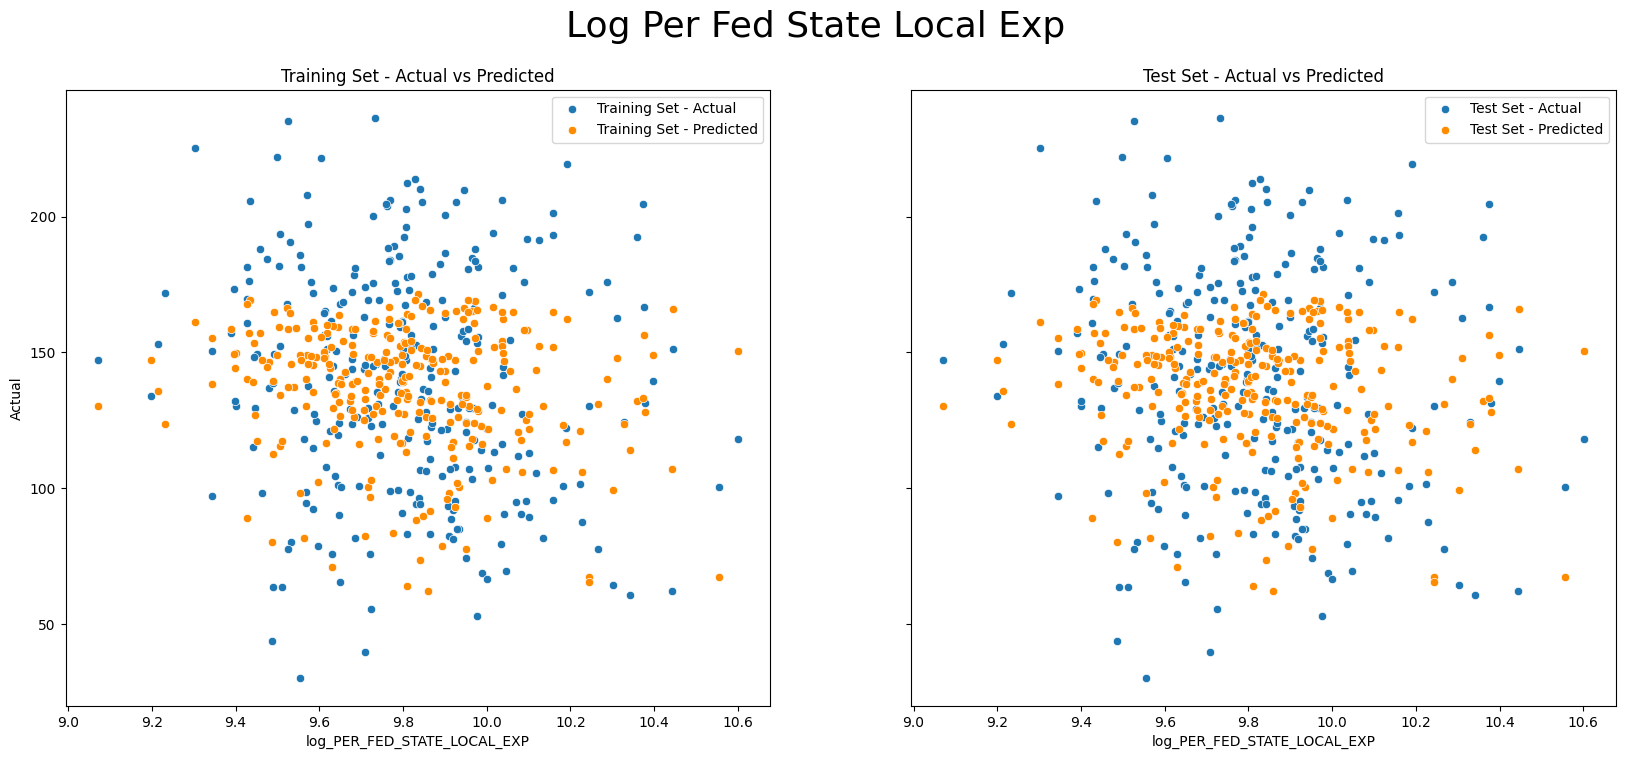

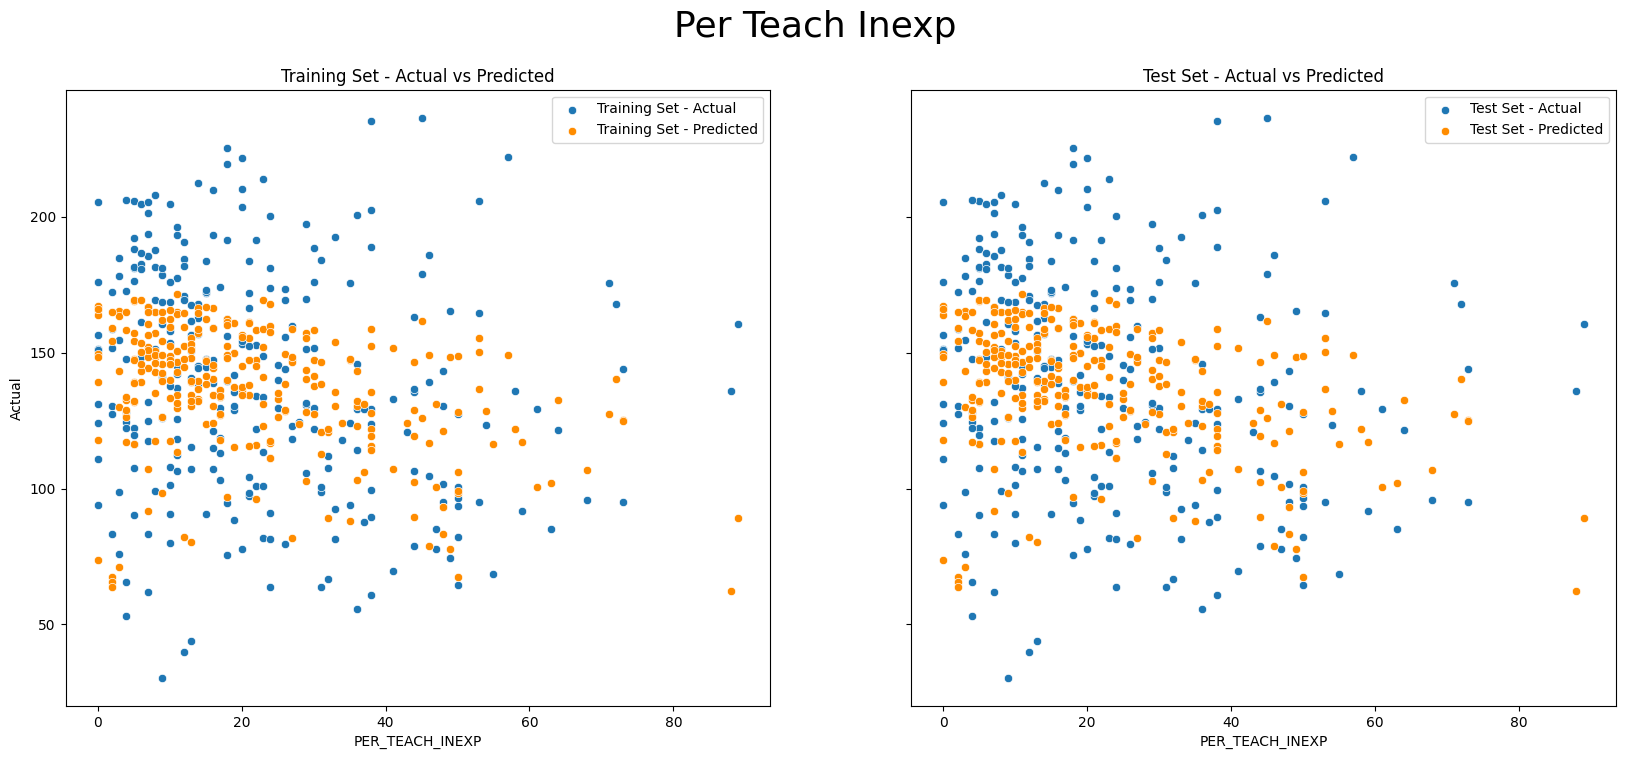

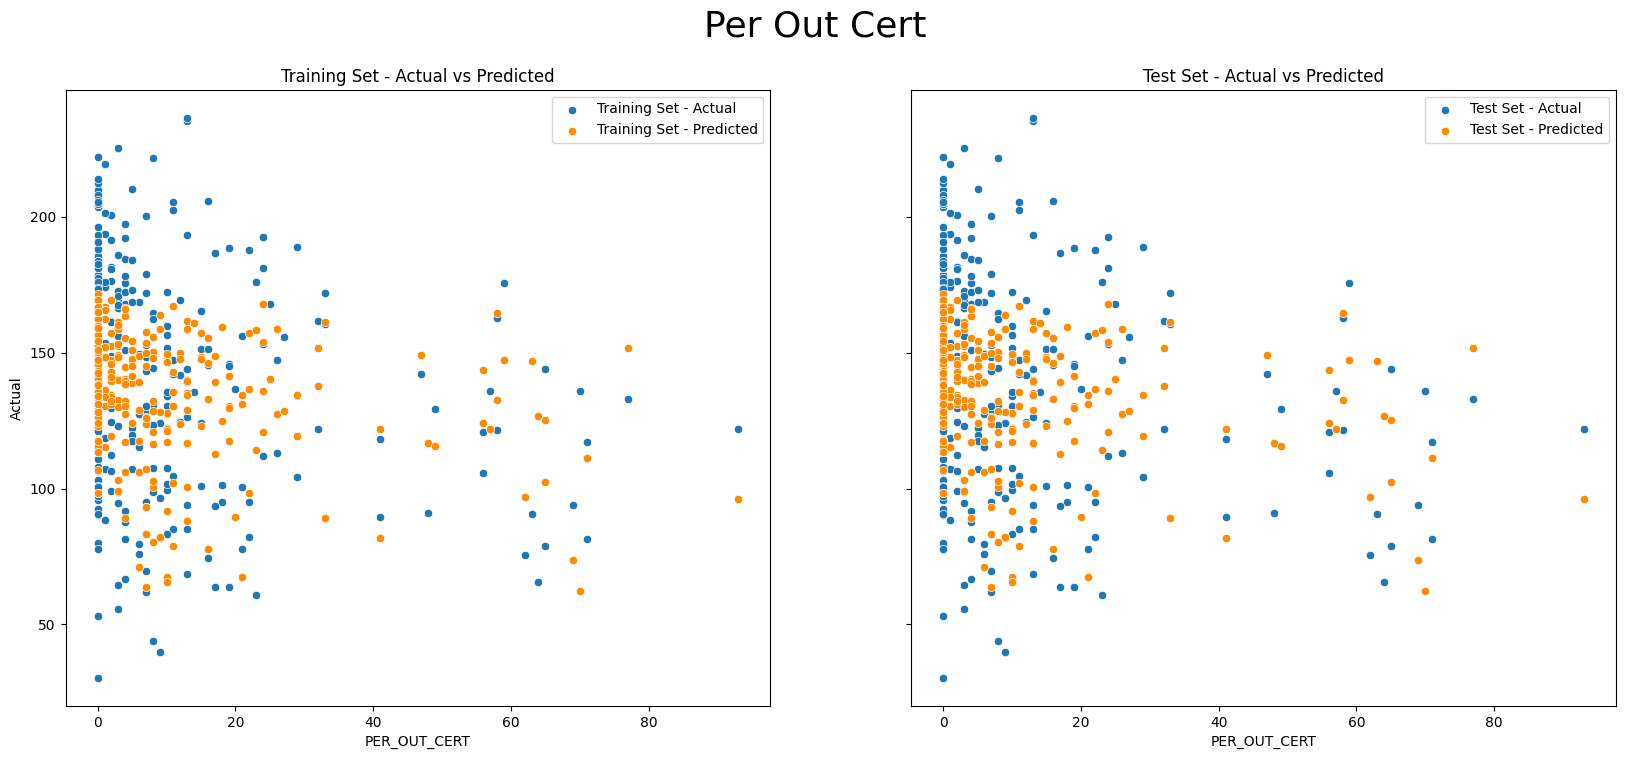

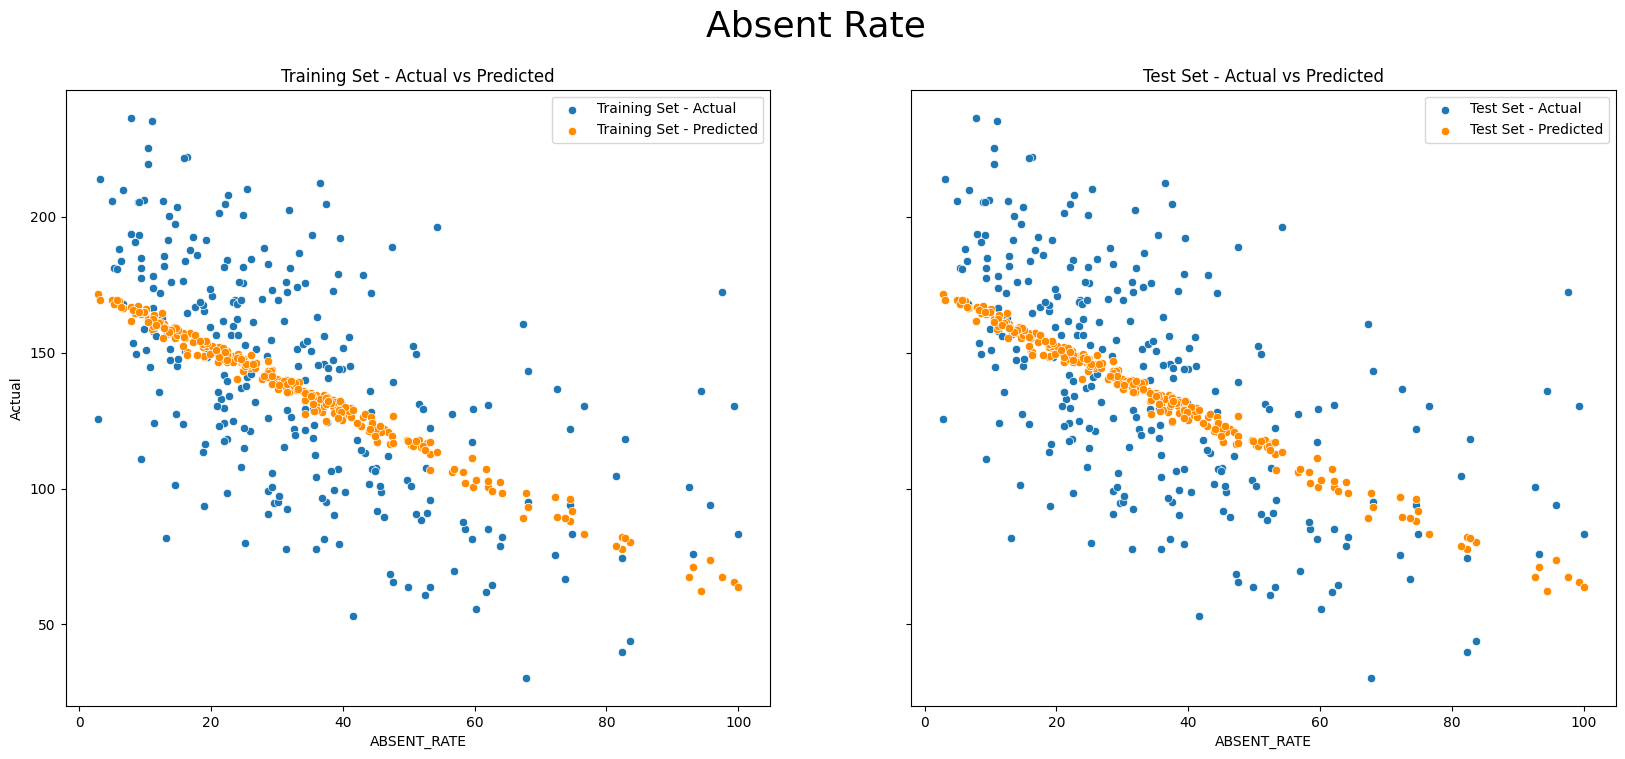

In [24]:
# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()


In [25]:
df_train[outcome]

3767    135.0
972     202.6
2547    138.7
4727    176.6
167     116.1
        ...  
3085    118.8
3879    134.5
273     136.7
4001     94.7
957      56.4
Name: CORE_INDEX, Length: 5062, dtype: float64

In [26]:
linreg.coef_

array([ 1.54593028, -0.14715221,  0.0745682 , -1.1246567 ])

In [27]:
df[features+[outcome]].corr()

log_PER_FED_STATE_LOCAL_EXP  PER_TEACH_INEXP  \
log_PER_FED_STATE_LOCAL_EXP                     1.000000         0.203424   
PER_TEACH_INEXP                                 0.203424         1.000000   
PER_OUT_CERT                                    0.120456         0.411877   
ABSENT_RATE                                     0.194598         0.333208   
CORE_INDEX                                     -0.110545        -0.236860   

                             PER_OUT_CERT  ABSENT_RATE  CORE_INDEX  
log_PER_FED_STATE_LOCAL_EXP      0.120456     0.194598   -0.110545  
PER_TEACH_INEXP                  0.411877     0.333208   -0.236860  
PER_OUT_CERT                     1.000000     0.300261   -0.169295  
ABSENT_RATE                      0.300261     1.000000   -0.583936  
CORE_INDEX                      -0.169295    -0.583936    1.000000

In [19]:
## Creating a dataframe with predictions in addition to actual outcomes for a scatter plot
scatter_df_top = df_train[features+[outcome]]
scatter_df_top["Source"] = "Actual"

scatter_df_bottom = df_train[features+["pred"]]
scatter_df_bottom["Source"] = "Prediction"
scatter_df_bottom.rename({"pred": outcome}, axis="columns", inplace=True)

## Concatonating
scatter_df = pd.concat([scatter_df_top, scatter_df_bottom])


In [20]:
scatter_df.sample(10)

log_PER_FED_STATE_LOCAL_EXP  PER_TEACH_INEXP  PER_OUT_CERT  ABSENT_RATE  \
3657                     9.893791             46.0          14.0         40.1   
184                      9.588160             11.0           0.0         28.2   
212                      9.867705             12.0           7.0         27.6   
2652                     9.942997             36.0          18.0         47.8   
453                      9.833065             11.0           0.0          9.8   
3082                     9.880219             28.0          13.0         35.3   
3768                     9.932706             34.0           7.0         26.9   
301                      9.539716             45.0           4.0         37.2   
1752                     9.701249             45.0          19.0         60.8   
854                      9.432764             11.0           5.0         21.8   

      CORE_INDEX      Source  
3657  125.455758  Prediction  
184   142.400000      Actual  
212   143.954837  Prediction  
2652  118.641765  Prediction  
453   153.000000      Actual  
3082  133.407301  Prediction  
3768  141.605237  Prediction  
301   127.571358  Prediction  
1752  102.397701  Prediction  
854   119.800000      Actual

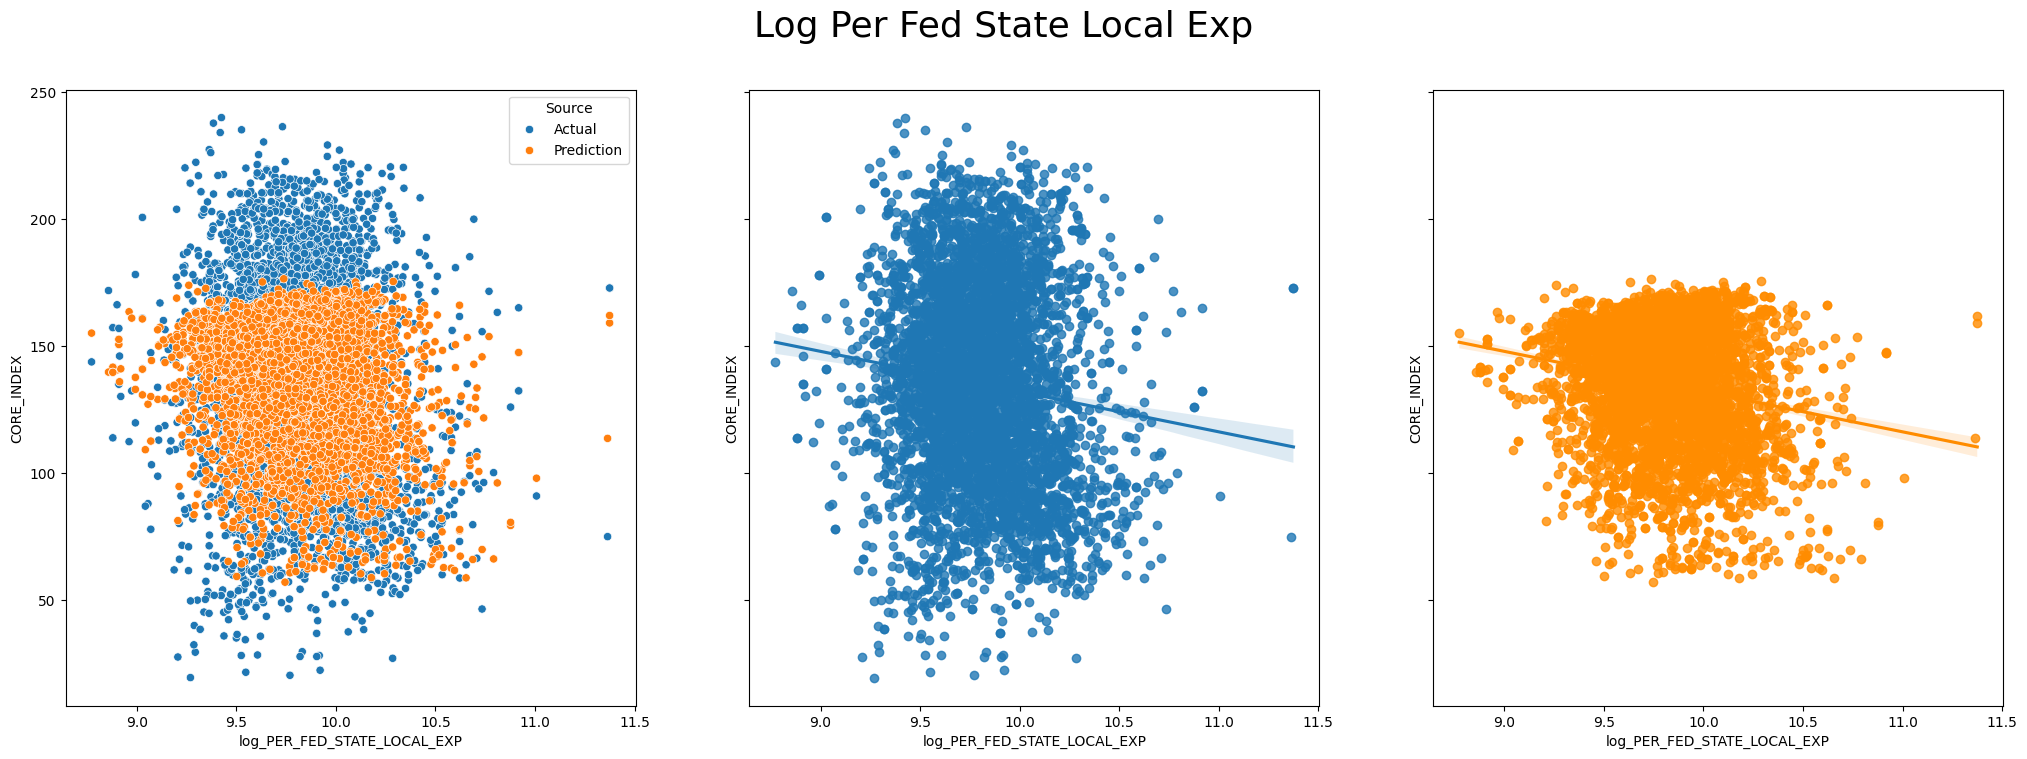

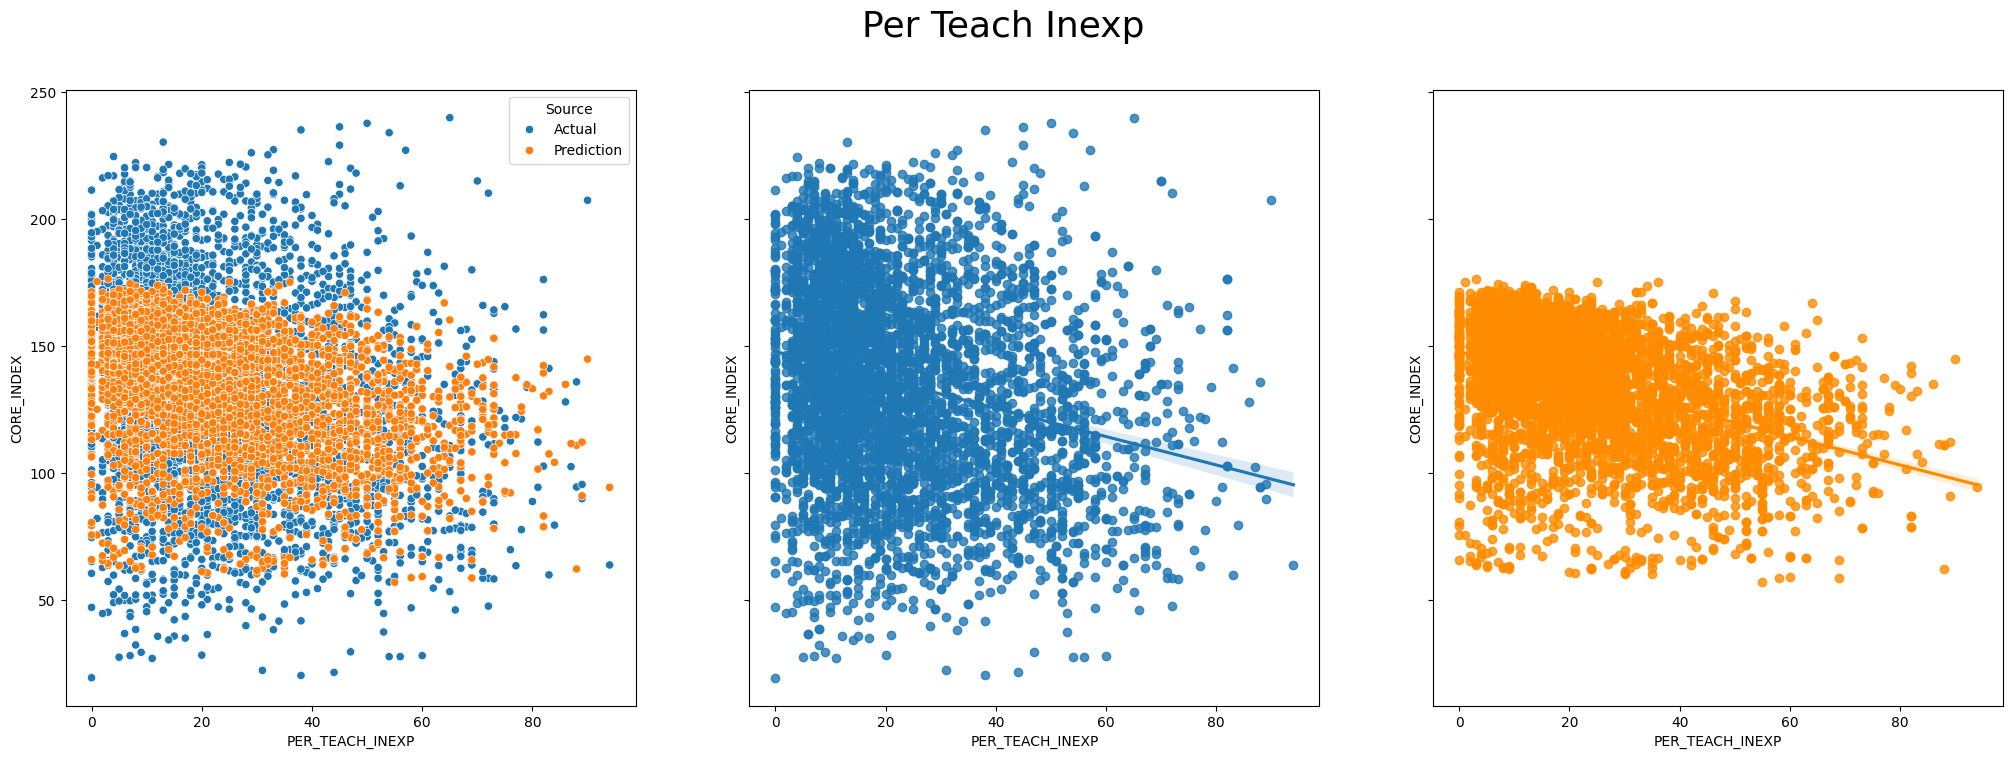

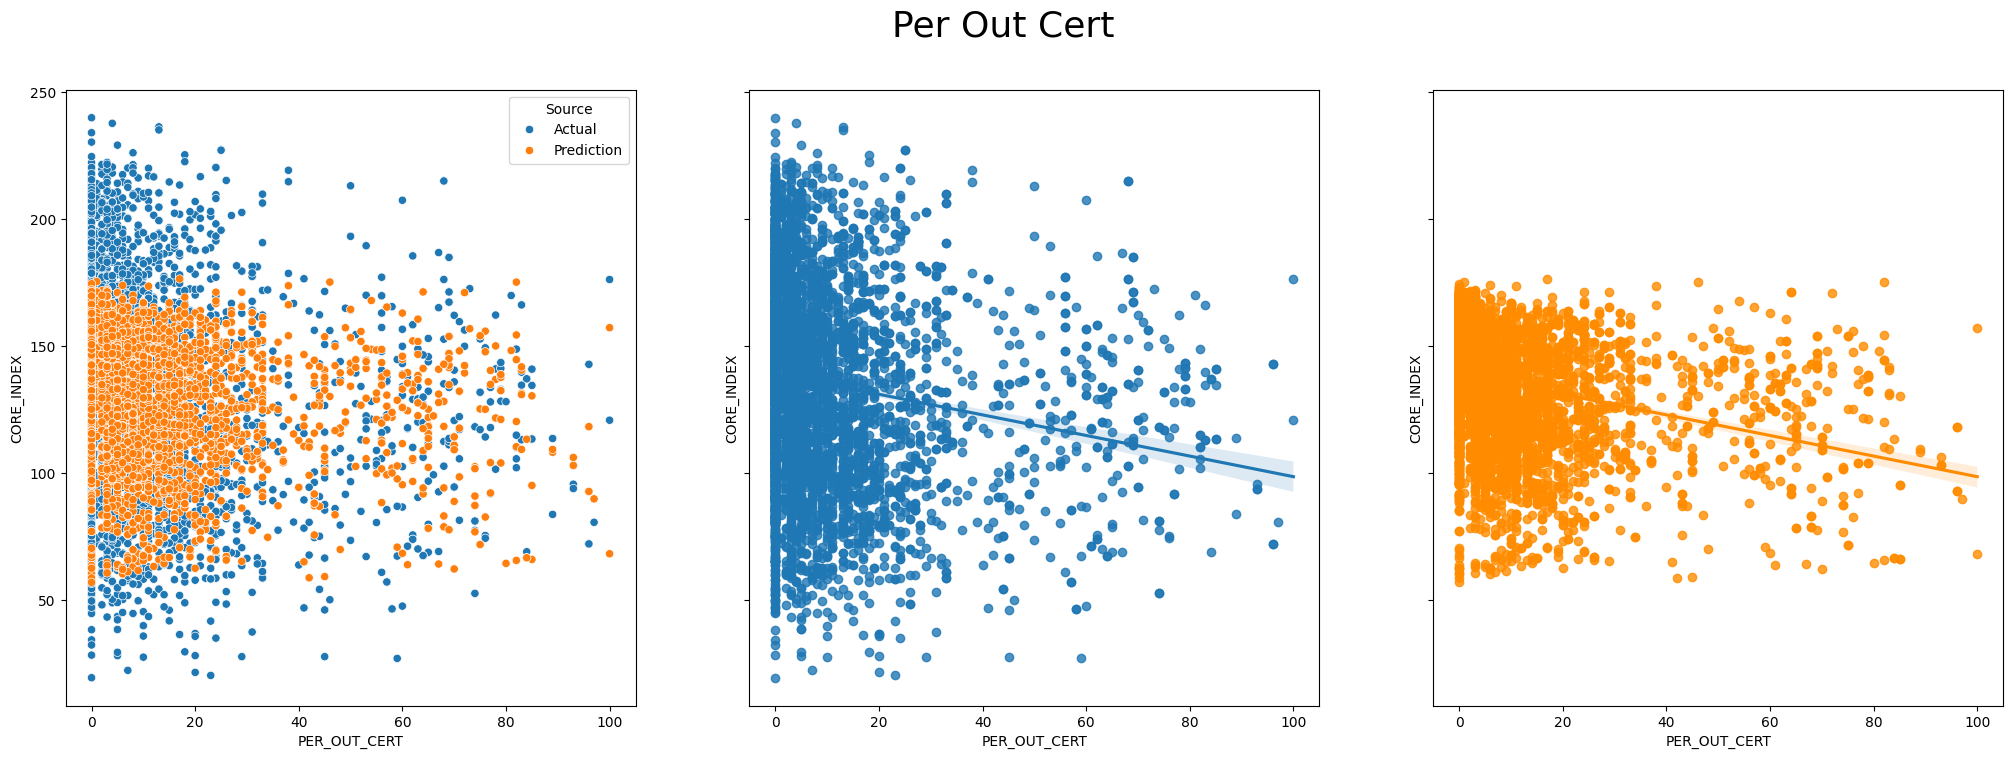

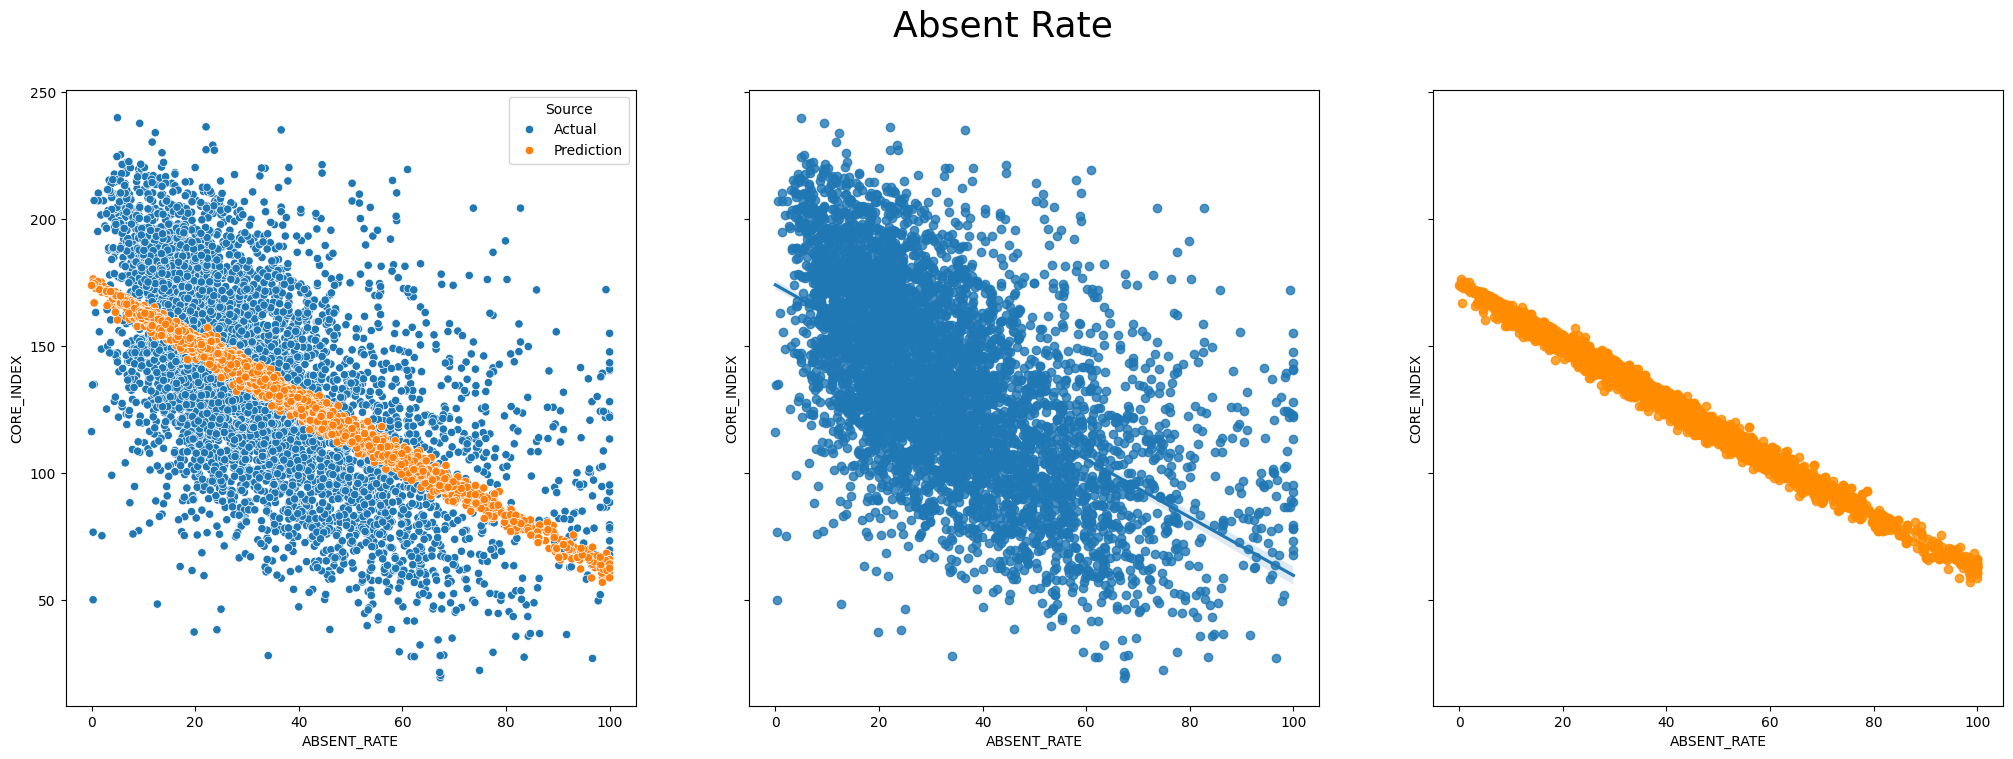

In [21]:
for feature in features:
    figure, axes = plt.subplots(1,3,  figsize=(25, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    sns.scatterplot(scatter_df, x=feature, y=outcome, hue="Source", ax=axes[0])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Actual"], x=feature, y=outcome, ax=axes[1])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Prediction"], x=feature, y=outcome, ax=axes[2], color="darkorange")
    
    plt.show()

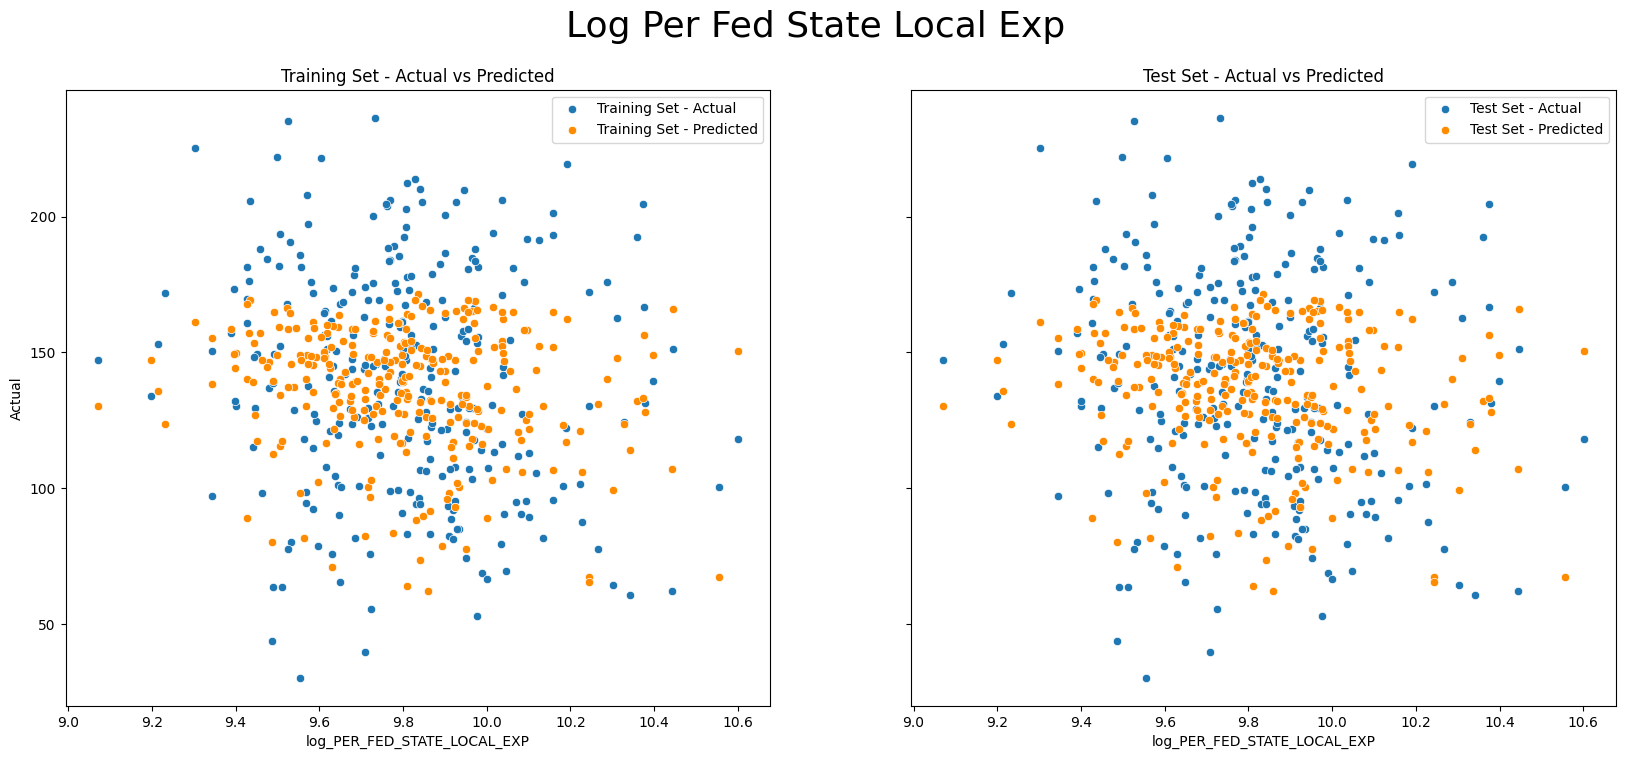

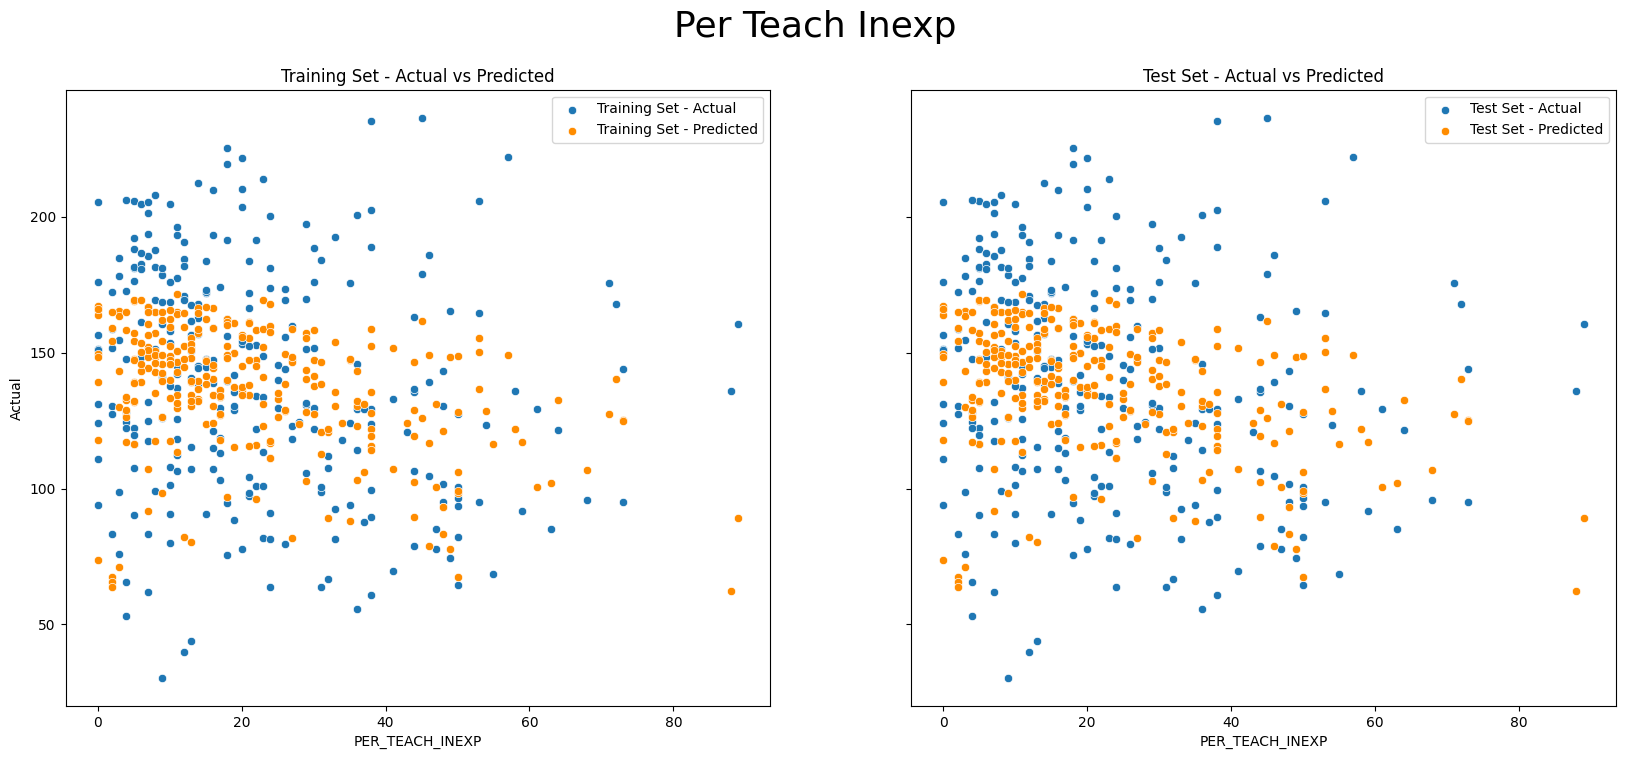

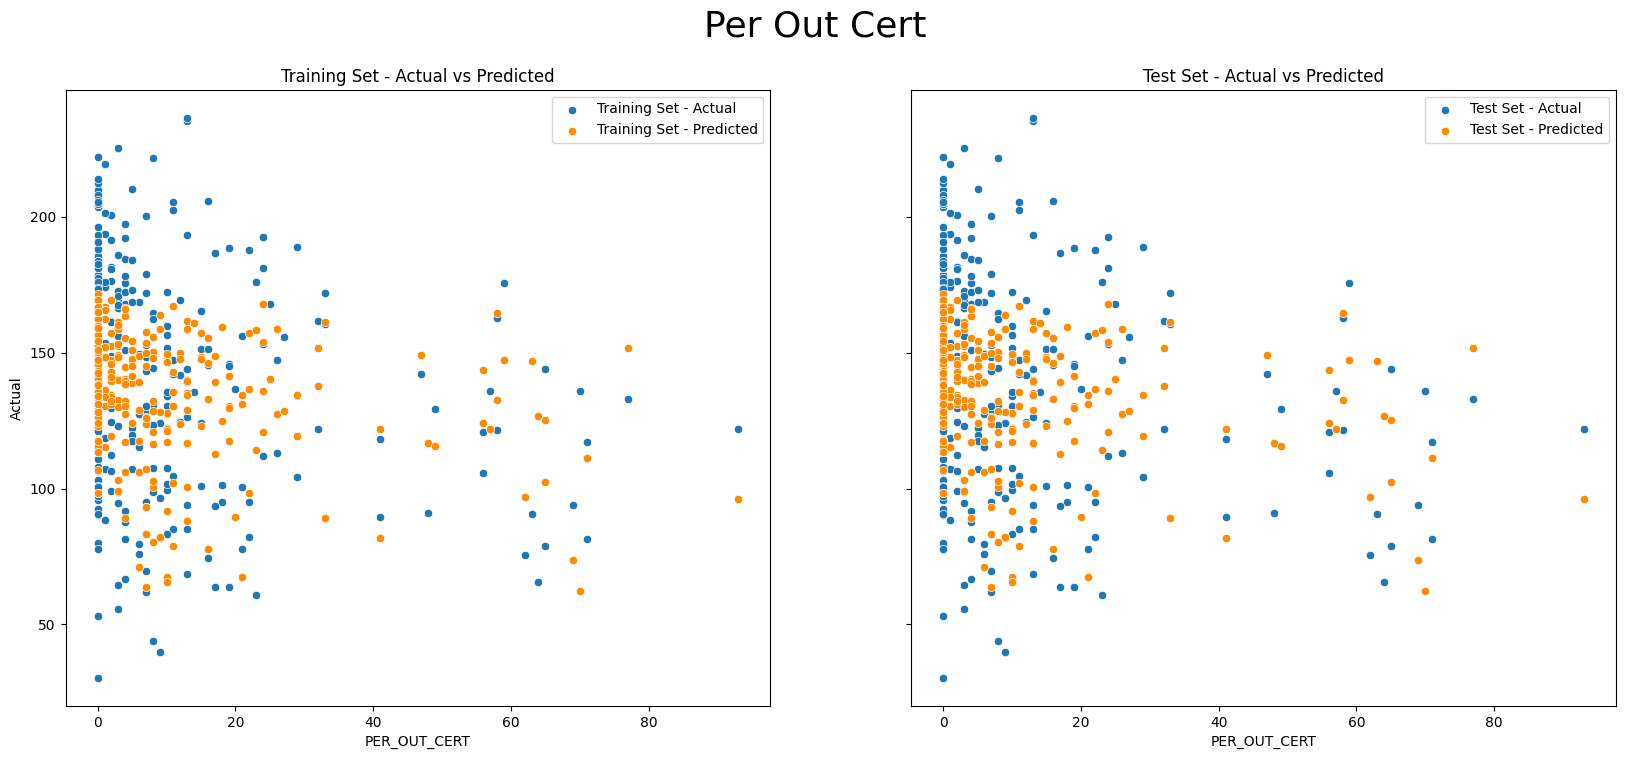

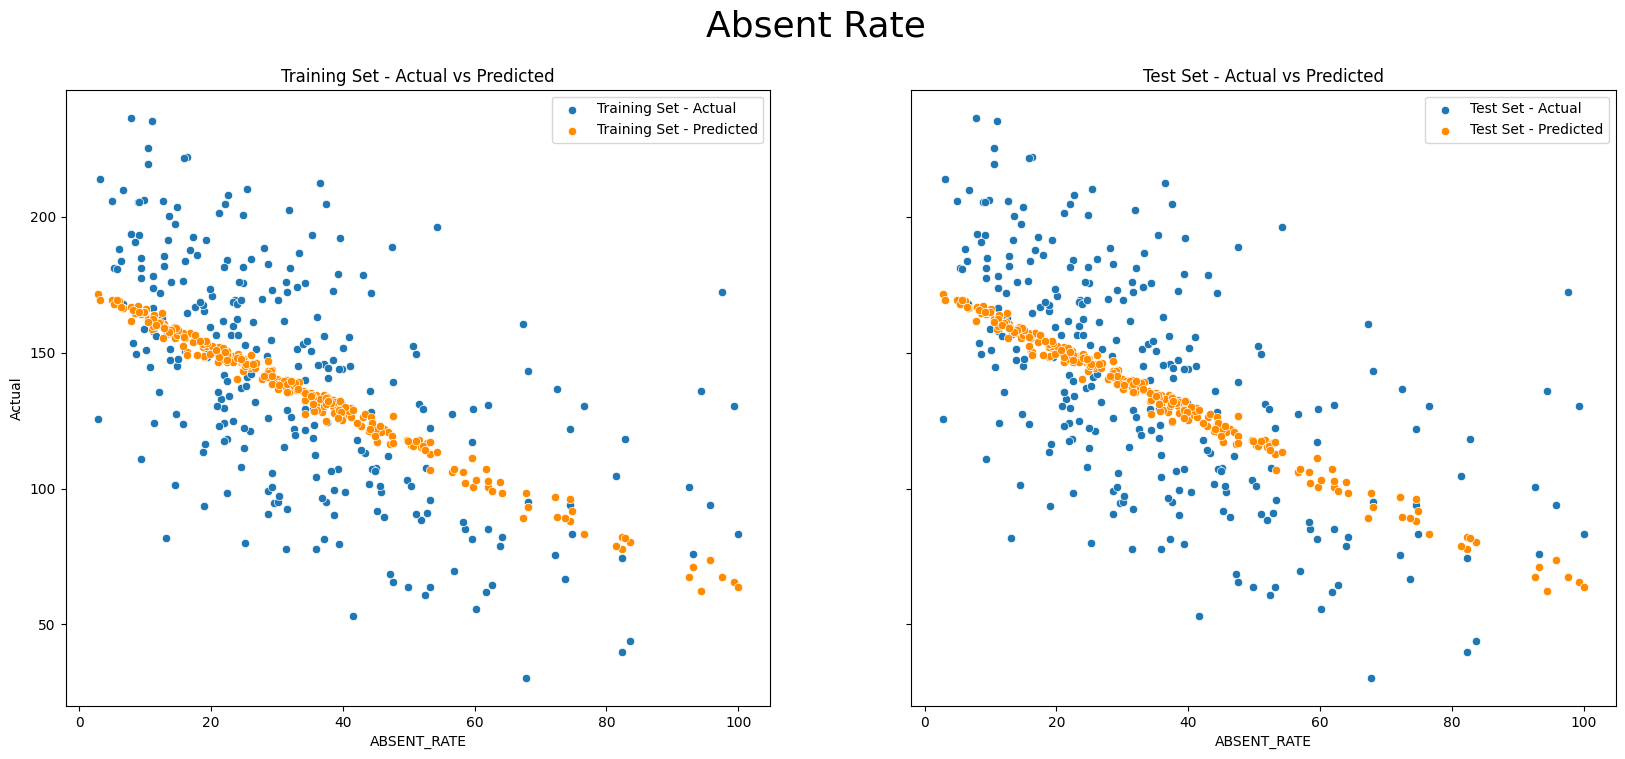

In [29]:
# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming df_train is your training dataset and features, outcome are defined
features = ['log_PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP', 'PER_OUT_CERT']
outcome = "CORE_INDEX"

# Create a polynomial regression model (degree = 2, you can change it)
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(df_train[features], df_train[outcome])

# Make predictions on the training set
predictions_poly = polyreg.predict(df_train[features])


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training set
polyreg_predictions = polyreg.predict(df_train[features])

# Calculate evaluation metrics
mae = mean_absolute_error(df_train[outcome], polyreg_predictions)
mse = mean_squared_error(df_train[outcome], polyreg_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_train[outcome], polyreg_predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 28.584562328597325
Mean Squared Error (MSE): 1277.7840911060302
Root Mean Squared Error (RMSE): 35.74610595723722
R-squared (R²): 0.16699700807405948


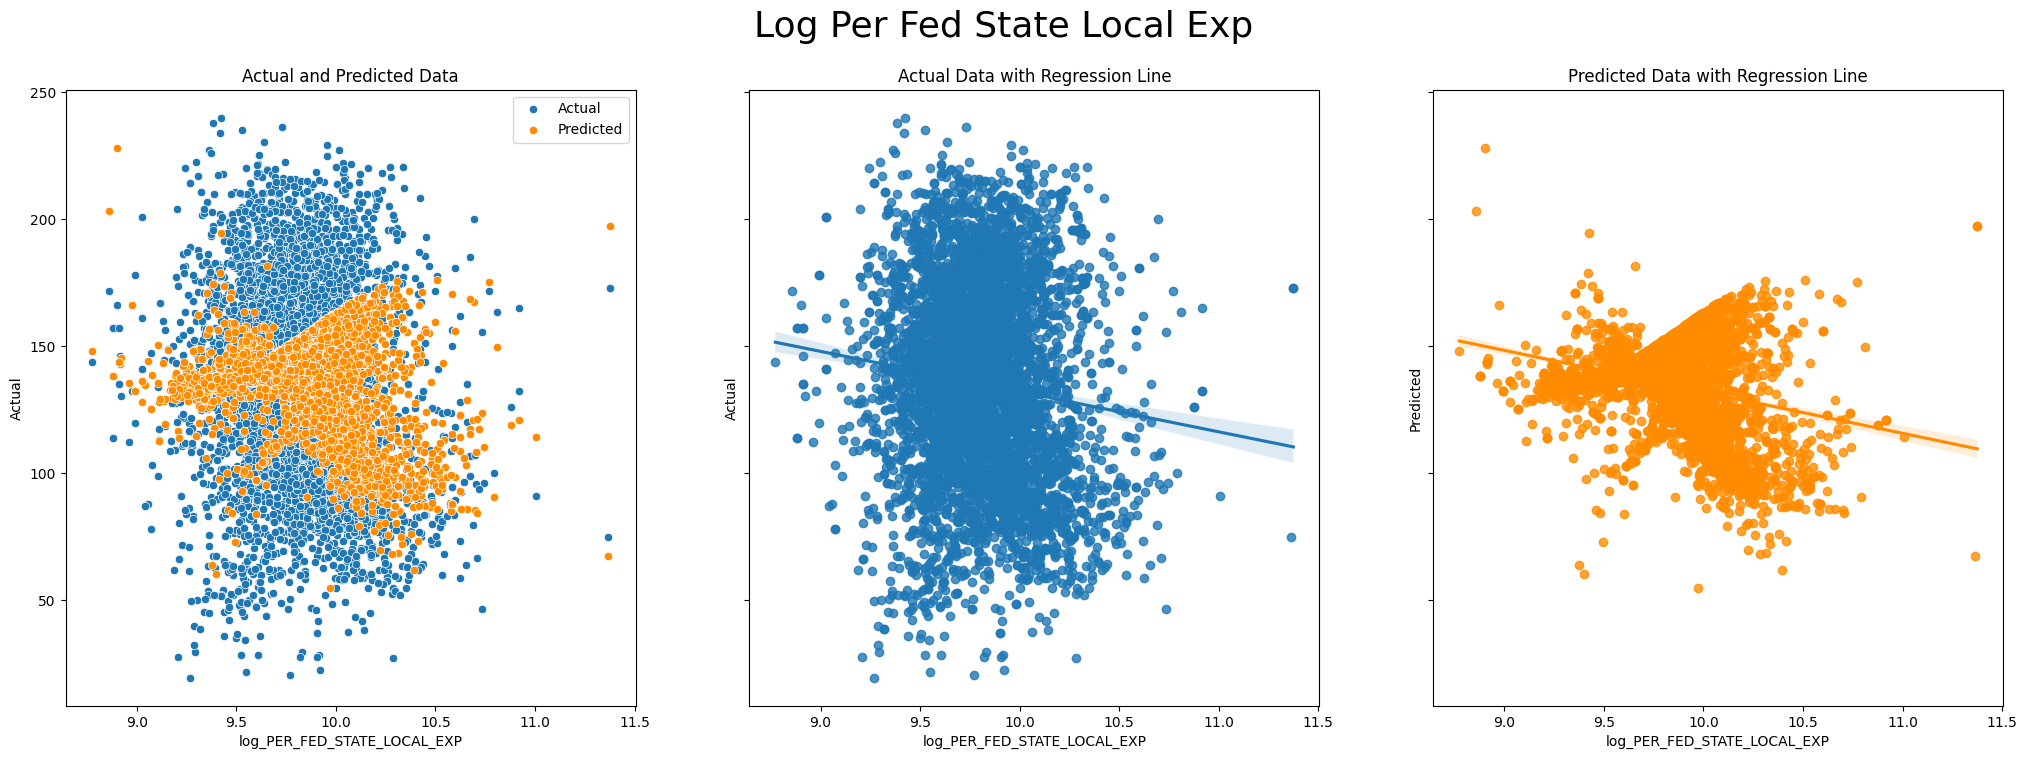

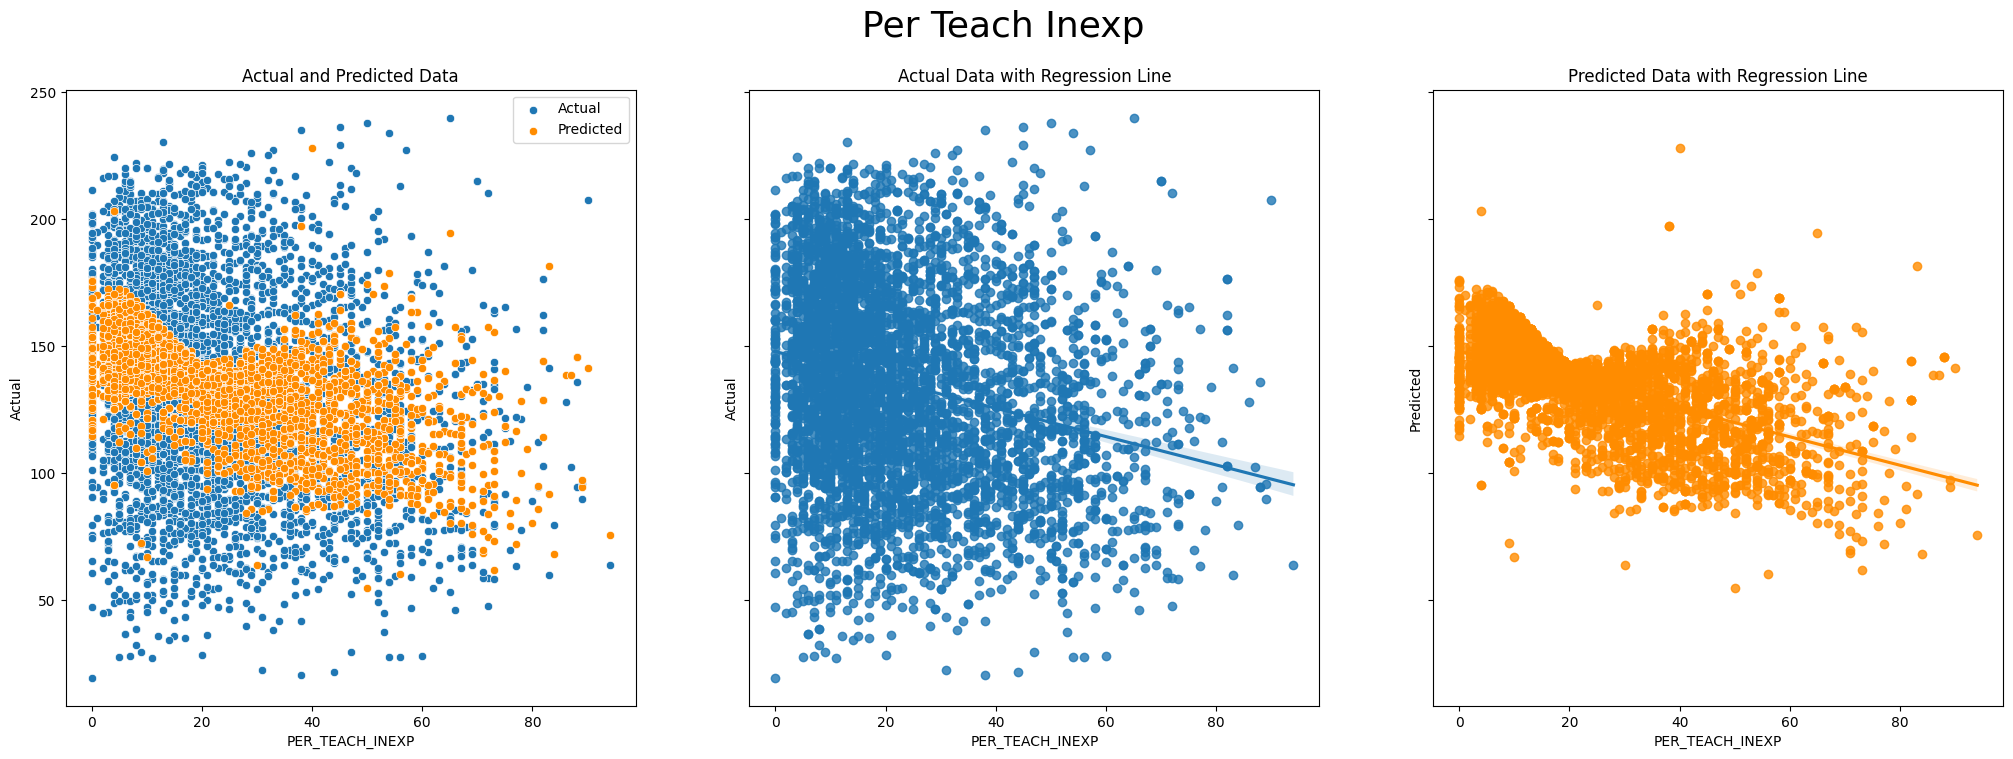

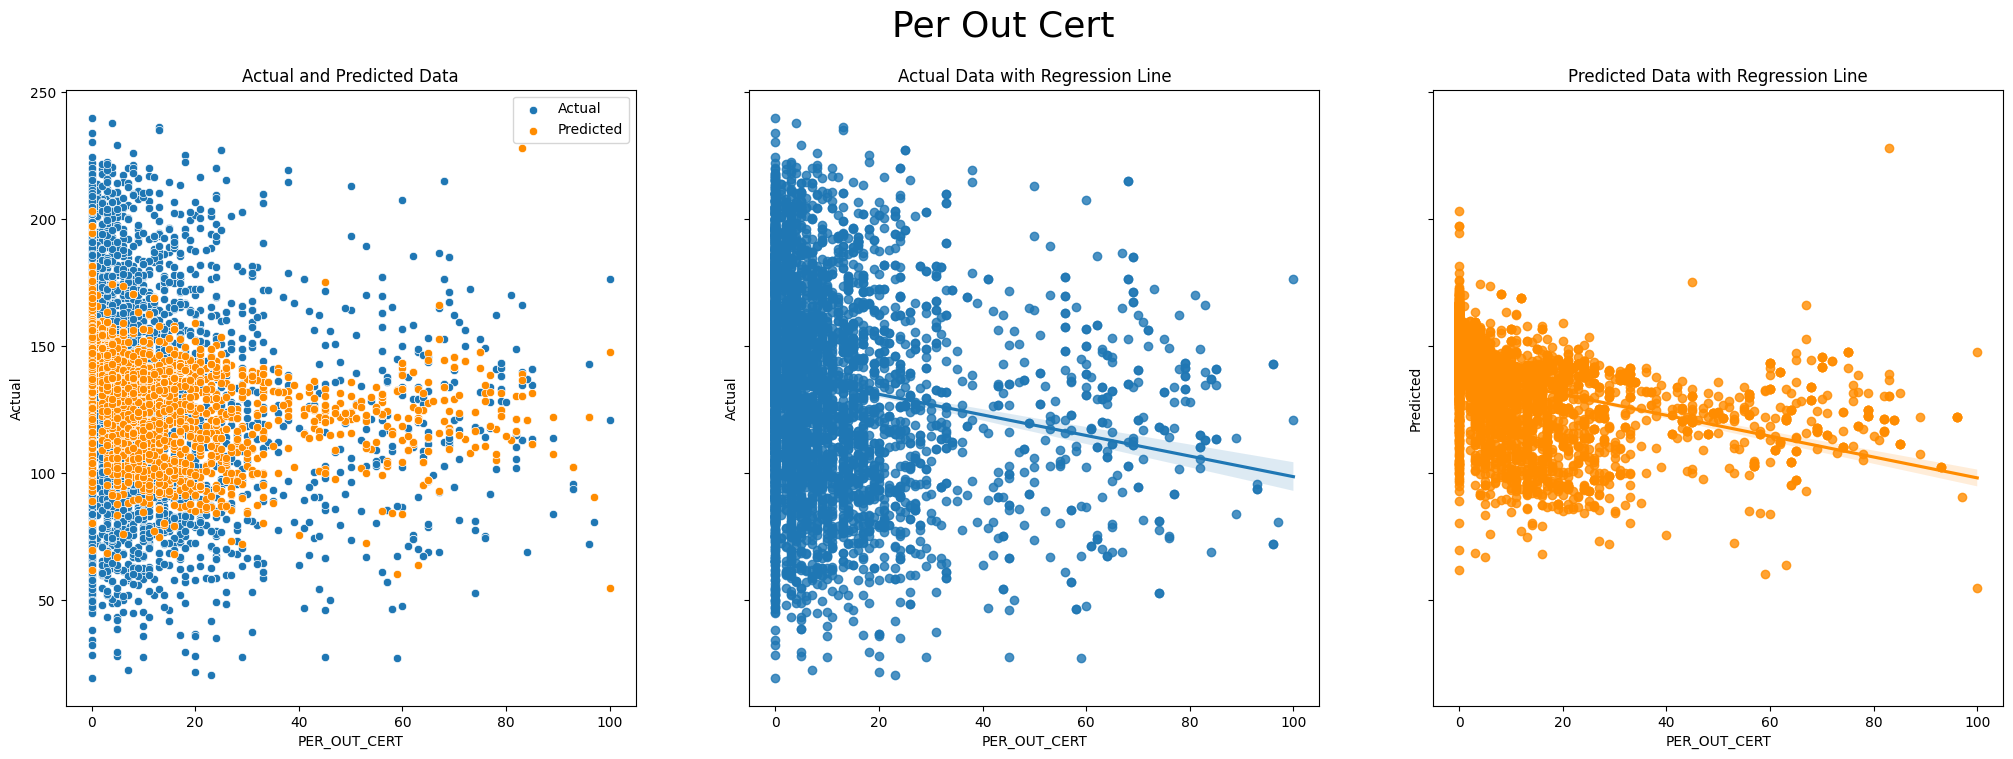

In [32]:
# Create a DataFrame with actual and predicted values
scatter_df = pd.DataFrame({
    'Actual': df_train[outcome],
    'Predicted': predictions_poly,
    'log_PER_FED_STATE_LOCAL_EXP': df_train['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_train['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_train['PER_OUT_CERT'],
    'CORE_INDEX': df_train['CORE_INDEX']
})

for feature in features:
    figure, axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for actual and predicted data points overlapped
    sns.scatterplot(data=scatter_df, x=feature, y='Actual', label='Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df, x=feature, y='Predicted', label='Predicted', ax=axes[0], color="darkorange")
    axes[0].set_title("Actual and Predicted Data")

    # Scatter plot for actual data points with regression line
    sns.regplot(data=scatter_df, x=feature, y='Actual', ax=axes[1])
    axes[1].set_title("Actual Data with Regression Line")

    # Scatter plot for predicted data points with regression line
    sns.regplot(data=scatter_df, x=feature, y='Predicted', ax=axes[2], color="darkorange")
    axes[2].set_title("Predicted Data with Regression Line")

    plt.show()
